In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import preprocessing
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

In [2]:
#import some data to play with
cd=pd.read_csv("Company_Data.csv")
cd

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
#using label Encoder function in categorical Column
lablel_encoder=preprocessing.LabelEncoder()
cd['ShelveLoc']=lablel_encoder.fit_transform(cd['ShelveLoc'])
cd['Urban']=lablel_encoder.fit_transform(cd['Urban'])
cd['US']=lablel_encoder.fit_transform(cd['US'])

In [4]:
cd

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


In [5]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    int32  
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    int32  
 10  US           400 non-null    int32  
dtypes: float64(1), int32(3), int64(7)
memory usage: 29.8 KB


In [6]:
cd["Sales"].min()


0.0

In [7]:
cd["Sales"].max()


16.27

In [8]:
cd["Sales"].value_counts()

7.80    4
8.77    3
9.32    3
4.10    3
6.20    3
       ..
3.67    1
7.62    1
9.54    1
8.41    1
9.71    1
Name: Sales, Length: 336, dtype: int64

In [9]:
cd['Sales'].median()

7.49

In [10]:
cd.loc[cd["Sales"]>=7.5,"sale"]="High"

In [11]:
cd.loc[cd.Sales <=7.5,"sale"]="Low"

In [12]:
cd.sale.value_counts()

Low     202
High    198
Name: sale, dtype: int64

In [13]:
cd

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sale
0,9.50,138,73,11,276,120,0,42,17,1,1,High
1,11.22,111,48,16,260,83,1,65,10,1,1,High
2,10.06,113,35,10,269,80,2,59,12,1,1,High
3,7.40,117,100,4,466,97,2,55,14,1,1,Low
4,4.15,141,64,3,340,128,0,38,13,1,0,Low
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,High
396,6.14,139,23,3,37,120,2,55,11,0,1,Low
397,7.41,162,26,12,368,159,2,40,18,1,1,Low
398,5.94,100,79,7,284,95,0,50,12,1,1,Low


In [14]:
cd['sale']=lablel_encoder.fit_transform(cd['sale'])

In [15]:
cd

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sale
0,9.50,138,73,11,276,120,0,42,17,1,1,0
1,11.22,111,48,16,260,83,1,65,10,1,1,0
2,10.06,113,35,10,269,80,2,59,12,1,1,0
3,7.40,117,100,4,466,97,2,55,14,1,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,0
396,6.14,139,23,3,37,120,2,55,11,0,1,1
397,7.41,162,26,12,368,159,2,40,18,1,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1,1


In [16]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    int32  
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    int32  
 10  US           400 non-null    int32  
 11  sale         400 non-null    int32  
dtypes: float64(1), int32(4), int64(7)
memory usage: 31.4 KB


In [17]:
#Divide datashet in to two part ,firt target varibale and 2nd independent variable
x=cd.iloc[:,1:11]
y=cd.iloc[:,11]

In [18]:
#split data in Train and Test 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

#Buid Decision Tree

#Build Decision Tree by Using Entropy method

In [19]:
model=DecisionTreeClassifier(criterion="entropy",max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

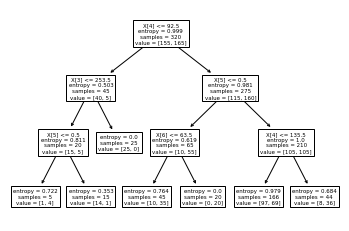

In [20]:
#Tree Plot
tree.plot_tree(model);

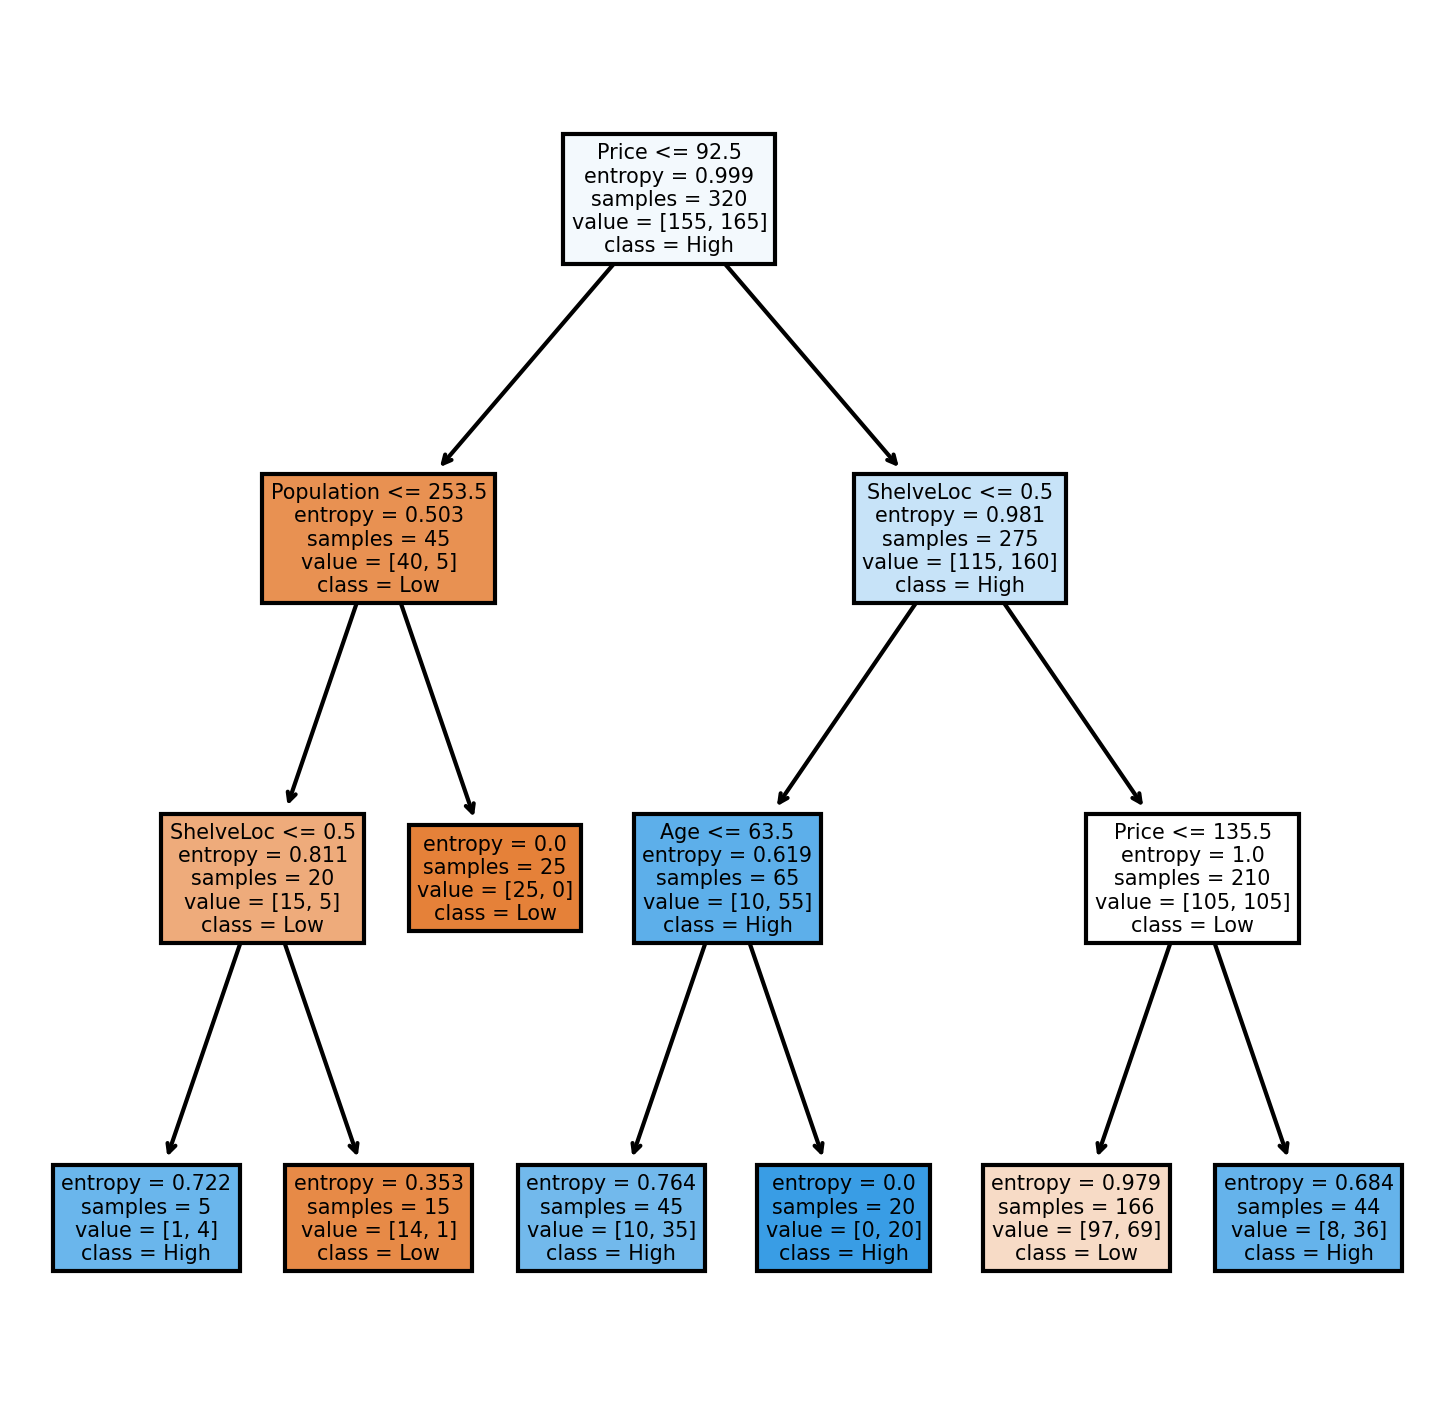

In [21]:
fn=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urba','US']
cn=['Low','High']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);


In [22]:
model.feature_importances_ 

array([0.        , 0.        , 0.        , 0.07662292, 0.5344712 ,
       0.31885118, 0.0700547 , 0.        , 0.        , 0.        ])

In [23]:
import pandas as pd 

feature_imp = pd.Series(model.feature_importances_,index=fn).sort_values(ascending=False) 
feature_imp

Price          0.534471
ShelveLoc      0.318851
Population     0.076623
Age            0.070055
CompPrice      0.000000
Income         0.000000
Advertising    0.000000
Education      0.000000
Urba           0.000000
US             0.000000
dtype: float64

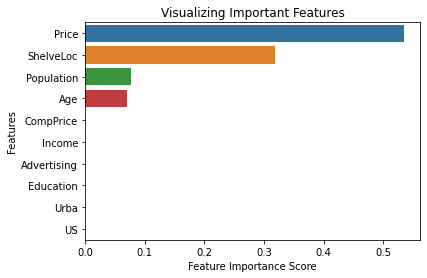

In [24]:
#create a barplot for Visulization

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [25]:
#Create a prediction on test
pred=model.predict(x_test)

pred

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1])

In [26]:
#create Cross tab
pd.crosstab(y_test,pred)

col_0,0,1
sale,,
0,35,8
1,19,18


In [27]:
#Find The Accuracy
np.mean(pred==y_test)

0.6625

# Buildint Desicion Tree Classifier (CART) by using gini

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
model_gini=DecisionTreeClassifier(criterion='gini',max_depth=3) 
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [30]:
#prediction and comute the accuracy

pred1=model_gini.predict(x_test)
pred1

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1])

In [31]:
#claculate accuracy
np.mean(pred1==y_test)

0.65

In [32]:
model_gini.feature_importances_

array([0.0038754 , 0.        , 0.06199267, 0.07639183, 0.58127124,
       0.27646886, 0.        , 0.        , 0.        , 0.        ])

In [33]:
#Decesion Tree Regrasion Example

from sklearn.tree import DecisionTreeRegressor 


In [34]:
cd1=cd.iloc[:,1:11]
cd1
cd1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   CompPrice    400 non-null    int64
 1   Income       400 non-null    int64
 2   Advertising  400 non-null    int64
 3   Population   400 non-null    int64
 4   Price        400 non-null    int64
 5   ShelveLoc    400 non-null    int32
 6   Age          400 non-null    int64
 7   Education    400 non-null    int64
 8   Urban        400 non-null    int32
 9   US           400 non-null    int32
dtypes: int32(3), int64(7)
memory usage: 26.7 KB


In [35]:
array=cd1.values
X=array[:,0:9]
Y=array[:,9]

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42) 

In [37]:
model=DecisionTreeClassifier(max_depth=3) 
model.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=3)

In [38]:
#find the test Accuracy
model.score(X_test,Y_test)

0.8939393939393939

In [39]:
#find the train Accuracy
model.score(X_train,Y_train)

0.9291044776119403